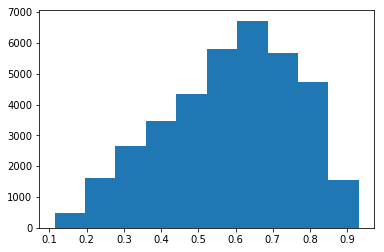

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  5 03:27:50 2018

finite size scaling


@author: wangj

"""

from package.hamiltonian import *
from package.PPFtfim import *
import matplotlib.pyplot as plt

import numpy as np


import multiprocessing





def f(L,p):
    M=DisorderedHamiltonian(int(L),p)
    t=tfim(M)
    return t.orderParameter_2()/L**2
    
def ff(Lp):
    return f(Lp[0],Lp[1])
    
    
def preEstimate(L,p):
    preSize=48
    cores = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    
    xs=np.ones((preSize,2))
    xs[:,0]=xs[:,0]*L
    xs[:,1]=xs[:,1]*p

    preArray=pool.map(ff, xs )
    pool.close()
    
#    preMean=np.mean(preArray)
    preStd=np.std(preArray)
    
    return preStd,preArray


def accurateEstimateList(L,p,error):
    preStd,preArray=preEstimate(L,p)
    accurateSize=int((preStd/error)**2+1)
    
    cores = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    
    xs=np.ones((accurateSize,2))
    xs[:,0]=xs[:,0]*L
    xs[:,1]=xs[:,1]*p

    accurateArray=pool.map(ff, xs)
    pool.close()
    
    accurateArray.extend(preArray)
    
    return accurateArray

def accurateEstimate(L,p,error):
    preStd,preArray=preEstimate(L,p)
    accurateSize=int((preStd/error)**2+1)
    
    cores = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    
    xs=np.ones((accurateSize,2))
    xs[:,0]=xs[:,0]*L
    xs[:,1]=xs[:,1]*p

    accurateArray=pool.map(ff, xs)
    pool.close()
    
    
    accurateArray.extend(preArray)
    
    accurateStd=np.std(accurateArray)
    accurateMean=np.mean(accurateArray)

    return accurateStd/np.sqrt(len(accurateArray )), accurateMean
    

def accurateEstimateCurve(L,ps,error):
    curve=np.zeros((len(ps),2))
    
    for i in range(len(ps)):        
        curve[i,:]=accurateEstimate(L,ps[i],error)
    return  curve[:,1], curve[:,0]


def accurateEstimateCurves(Ls,ps,error):
    curveNumbers=len(Ls)
    steps=len(ps)
    SGmean=np.zeros((curveNumbers,steps))
    SGstd=np.zeros((curveNumbers,steps))
    for n in range(curveNumbers):
        SGmean[n,:], SGstd[n,:]=accurateEstimateCurve(Ls[n],ps,error)
        
    for n in range(curveNumbers):
        print(n)
        plt.errorbar(ps,SGmean[n,:],yerr=SGstd[n,:],fmt='-o')
    plt.savefig('foo.png')
    plt.show()

        
    
    
re=accurateEstimateList(16,4,0.001)

plt.hist(re)



#steps=10  
#ps=np.zeros(steps)
#for i in range(steps):
#        ps[i]=2.0*(4.0/2.0)**(i*1.0/(steps-1))
#        
#accurateEstimateCurves([16,32,48],ps,0.1)

    
    
#
#class SpinGlassOrder(object):
#    def __init__(self,L,):





def run(L):
    # L=8,10,12,14,16
    steps=10
    
    
    
    disOrder=np.zeros(steps)
    RR=np.zeros(steps)
    
    SG_mean=np.zeros(steps)
    SG_std=np.zeros(steps)
    
    
    for i in range(steps):
        RR[i]=10
        disOrder[i]=2.0*(4.0/2.0)**(i*1.0/(steps-1))
    
    for i in range(steps):
        print(i)
        output=np.zeros(int(RR[i]))

        for j in range(int(RR[i])):
            M=DisorderedHamiltonian(L,disOrder[i])
            t=tfim(M)
            output[j]=t.orderParameter_2()/L**2


        SG_mean[i]=np.mean(output)
        SG_std[i]=np.std(output)
        
    plt.semilogx(disOrder,SG_mean,'o-',disOrder,SG_std,'.-')
    plt.show()
    
    
    
    RR2=np.zeros(steps)
    
    SG_mean2=np.zeros(steps)
    
    
    for i in range(steps):
        RR2[i]=(SG_std[i]/0.01)**2+1
    print(RR2)
    
    for i in range(steps):
        print(i)
        output=np.zeros(int(RR2[i]))
        
        
#        for j in range(int(RR2[i])):
#            M=DisorderedHamiltonian(L,disOrder[i])
#            t=tfim(M)
#            output[j]=t.orderParameter_2()/L**2
            
        def f(j):
            M=DisorderedHamiltonian(L,disOrder[i])
            t=tfim(M)
            return t.orderParameter_2()/L**2
            
            
        output=pool.map(f, range(int(RR2[i])))
        
        SG_mean2[i]=np.mean(output)
        SG_mean2[i]=(SG_mean2[i]*RR2[i]+SG_mean[i]*RR[i])/(RR2[i]+RR[i])
        
    plt.semilogx(disOrder,SG_mean2,'o-',disOrder,SG_std,'.-')
    plt.show()
    
    np.save("data3Log"+str(L), SG_mean2)


#for i in [16,32,48]:
#    print("*********************** Now the size is  *********************")
#    print("                              "+str(i))
#    print("*********************** Now the size is  *********************")
#
#    run(i)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 18 01:03:40 2018

@author: jian
"""

import numpy as np
import matplotlib.pyplot as plt
steps=10

disOrder=np.zeros(10)

for i in range(10):
    disOrder[i]=2.0*(4.0/2.0)**(i*1.0/(steps-1))
print(disOrder)


for i in [16,32,48]:
    s=np.load("data3Log"+str(i)+".npy")*i**0
    plt.semilogx(disOrder,s,'.-')

plt.xlabel("disorder strength $\delta J$",fontsize=20)
plt.ylabel("$ \chi_{SG} /L^{  } $",fontsize=20)
#plt.legend(["8","10","12","14","16"],loc=4)

plt.show()



for i in [16,32,48]:
    s=np.load("data3Log"+str(i)+".npy")*i**0
    plt.plot(disOrder,s,'.-')

plt.xlabel("disorder strength $\delta J$",fontsize=20)
plt.ylabel("$ \chi_{SG} /L^{2} $",fontsize=20)
plt.legend(["8","10","12","14","16"],loc=4)

plt.show()